# Laboratorium 2


### Konfiguracja

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import random
import math
import functools
import time


class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(self.scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(self.scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.collection)
        for collection in self.scenes[self.i].points:
            self.ax.scatter(*zip(*collection.points), c=collection.color)
        self.ax.autoscale()
        plt.draw()

### Interfejsy

In [4]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None):
        self.points = np.array(points)
        self.color = color

class LinesCollection:
    def __init__(self, lines = [], color = None):
        if color:
            self.collection = mcoll.LineCollection(lines, colors=[mcolors.to_rgba(color)] * len(lines))
        else:
            self.collection = mcoll.LineCollection(lines)
            


class Plot:
    def __init__(self, scenes = []):
        self.scenes = scenes
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
    

### Przykład użycia

### Rozwiązanie

In [5]:
points_A = PointsCollection( [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(100)] )

circle_angles = [ random.uniform(0, 2*math.pi) for _ in range(100) ]
points_B = PointsCollection( [(math.sin(angle) * 10, math.cos(angle) * 10) for angle in circle_angles] )

points_C = PointsCollection( 
    [(10, random.uniform(-10, 10)) for _ in range(25)] 
    + [(-10, random.uniform(-10, 10)) for _ in range(25)] 
    + [(random.uniform(-10, 10), 10) for _ in range(25)] 
    + [(random.uniform(-10, 10), -10) for _ in range(25)] 
)
pD_przekatna = []
for _ in range(25):
    x = random.uniform(0, 10)
    pD_przekatna.append( (x, x))
for _ in range(25):
    x = random.uniform(0, 10)
    pD_przekatna.append((x, 10-x) )
points_D = PointsCollection( 
    [(0,0), (10,0), (10,10), (0,10)] 
    + [(0, random.uniform(0, 10)) for _ in range(25)] 
    + [(random.uniform(0, 10), 0) for _ in range(25)] 
    + pD_przekatna
)

In [6]:
def create_A(xMin, xMax, yMin, yMax, num):
    return PointsCollection( [(random.uniform(xMin, xMax), random.uniform(yMin, yMax)) for _ in range(num)] )

def create_B(rad, num):
    circle_angles = [ random.uniform(0, 2*math.pi) for _ in range(num) ]
    return PointsCollection( [(math.sin(angle) * rad, math.cos(angle) * rad) for angle in circle_angles] )

def create_C(xMin, xMax, yMin, yMax, num):
    return PointsCollection( 
    [(yMin, random.uniform(xMin, xMax)) for _ in range(int(num/4))] 
    + [(yMax, random.uniform(xMin, xMax)) for _ in range(int(num/4))] 
    + [(random.uniform(yMin, yMax), xMax) for _ in range(int(num/4))] 
    + [(random.uniform(yMin, yMax), xMin) for _ in range(int(num/4))]) 
        
def create_D(y, x, size, numSides, numDiag):
    pD_przekatna = []
    for _ in range(numDiag):
        diag = random.uniform(0, size)
        pD_przekatna.append( (x+diag, y+diag))
    for _ in range(numDiag):
        diag = random.uniform(0, size)
        pD_przekatna.append((x+diag, y+size-diag) )
    return PointsCollection( 
        [(x,y), (x+size, y), (x, y+size), (x+size, y+size)] 
        + [(x, random.uniform(y, y+size)) for _ in range(numSides)] 
        + [(random.uniform(x, x+size), y) for _ in range(numSides)] 
        + pD_przekatna
    )    

<IPython.core.display.Javascript object>


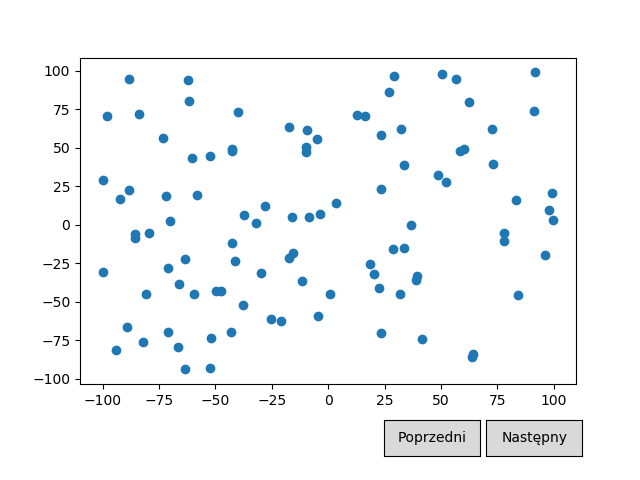

In [7]:
%matplotlib notebook

scenes=[Scene([points_A]) ]

plot = Plot(scenes)
plot.draw() 

<IPython.core.display.Javascript object>


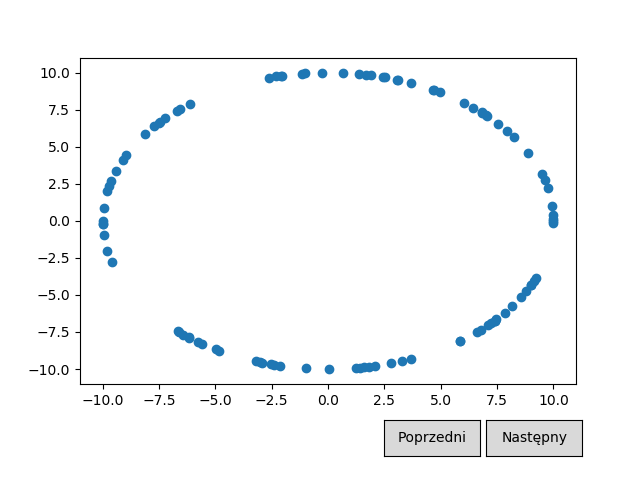

In [8]:
%matplotlib notebook

scenes=[Scene([points_B]) ]

plot = Plot(scenes)
plot.draw() 


<IPython.core.display.Javascript object>


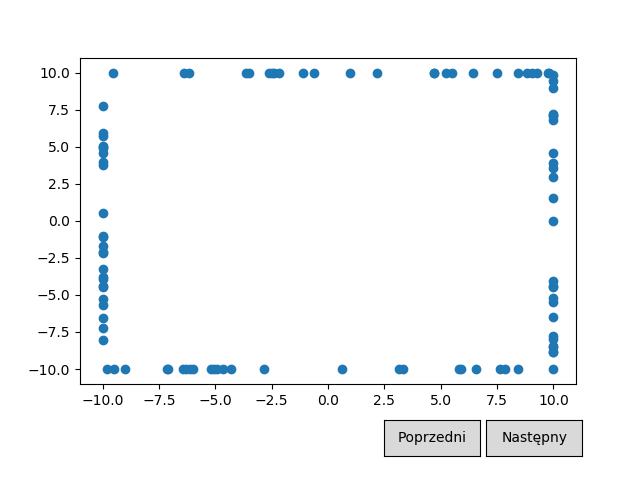

In [9]:
%matplotlib notebook
scenes=[Scene([points_C]) ]

plot = Plot(scenes)
plot.draw() 

<IPython.core.display.Javascript object>


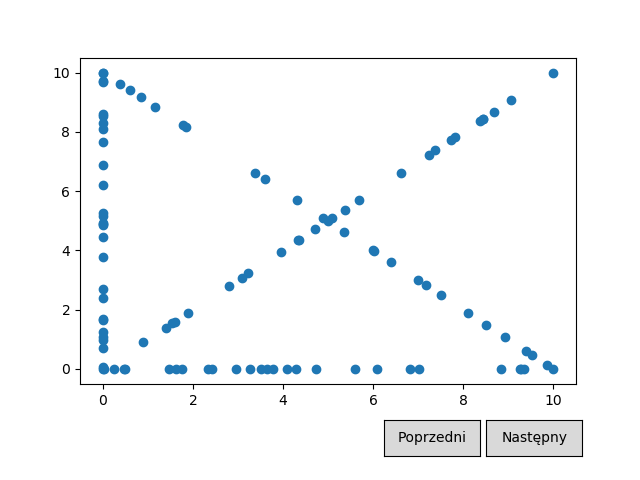

In [10]:
%matplotlib notebook
scenes=[Scene([points_D]) ]

plot = Plot(scenes)
plot.draw() 

In [7]:
EPS = 10**(-13)
def orient2(a, b, c):
    arr = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])
    det = np.linalg.det(arr)
    #print("det", det)
    if det-EPS > 0: return 1
    elif det+EPS < 0: return -1
    else: return 0
    
def orient(a, b, c):
    arr = np.array([ [a[0] - c[0], a[1] - c[1]], [b[0]-c[0], b[1]-c[1]] ])
    det = np.linalg.det(arr)
    #print("det", det)
    if det-EPS > 0: return 1
    elif det+EPS < 0: return -1
    else: return 0

def points_to_lines(points, circle = True):
    lines = []
    it = 0;
    while(it < len(points) - 1):
        lines.append( [points[it], points[it+1]] )
        it += 1
    if(circle):lines.append( [points[it], points[0]] )
    return lines;

In [23]:
def sortPoints(in_point_list, base_point):
    point_list = in_point_list.copy()
    def compare(pA, pB):
        orientVal = orient(base_point, pA, pB)
        retVal = 0
        if(orientVal > 0): #po lewej
            retVal = -1
        elif(orientVal < 0): #po prawej
            retVal = 1
        else: # odleglosc
            distA = (base_point[0] - pA[0])**2 + (base_point[1] - pA[1])**2
            distB = (base_point[0] - pB[0])**2 + (base_point[1] - pB[1])**2
            if(distA > distB):
                retVal = 1
            else:
                retVal = -1
        return retVal
    return sorted(point_list, key=functools.cmp_to_key(compare))

def Graham(in_point_list, animation=False):
    time_start = time.time()
    point_list = []
    out = []
    animation_scene_list = []
    min_point = in_point_list[0]
    min_point_ID = 0
    
    for pID, (pX, pY) in enumerate(in_point_list):
        if(min_point[1] > pY):
            min_point = (pX, pY)
            min_point_ID = pID
        elif(min_point[1] == pY):
            if(min_point[0] > pX):
                min_point = (pX, pY)
                min_point_ID = pID
    
    for pID, (pX, pY) in enumerate(in_point_list):
        if(pID != min_point_ID):
            point_list.append( (pX, pY) )
    point_list = np.array( sortPoints(point_list, min_point) )
    out.append(np.array( min_point ))
    out.append(point_list[0])

    listIndex = 1
    while listIndex < len(point_list):
        if(animation):
            animation_scene_list.append( 
                Scene([
                        PointsCollection(np.array(in_point_list).copy(), 'silver'),
                        PointsCollection(np.array(out).copy(), 'green')
                      ],
                     [
                        LinesCollection(points_to_lines([out[-2], out[-1], point_list[listIndex]], False), 'red'),
                        LinesCollection(points_to_lines(out[:-1], False), 'black')
                     ])
            )
        ori = orient(out[-2], out[-1], point_list[listIndex])
        if(ori == -1 ):
            out.pop()
        elif(ori == 1):
            out.append(point_list[listIndex])
            listIndex += 1
        else:   # na linii
            distA = (out[-2][0] - point_list[listIndex][0])**2 + (out[-2][1] - point_list[listIndex][1])**2
            distB = (out[-2][0] - out[-1][0])**2 + (out[-2][1] - out[-1][1])**2
            if(distA > distB):
                out.pop();
                out.append(point_list[listIndex])
            listIndex += 1
            
    print("Graham time: ", time.time() - time_start, "Liczba wierzchołków: ", len(out))
    return out, animation_scene_list

#Graham(points_A.points)

In [28]:
%matplotlib notebook
def dist(pA, pB):
    return ((pA[0] - pB[0])**2 + (pA[1] - pB[1])**2)

def find_next(point_list, curr_A, curr_B):
    best_point = point_list[0]
    best_point_ID = 0
    for i, point in enumerate(point_list):
        if(orient(curr_A, curr_B, point) >= 0):
            ori = orient(curr_B, best_point, point)
            if(ori == -1):
                best_point = point
                best_point_ID = i
            elif(ori == 0):
               # print("ORI=0", curr_B, best_point, point)
                distNew = dist(curr_B, point)
                distBest = dist(curr_B, best_point)
                if(distNew > distBest):
                    best_point = point
                    best_point_ID = i
    return best_point_ID             
                
def Jarvis(in_point_list, animation=False):
    time_start = time.time()
    point_list = []
    out = []
    animation_scene_list = []
    min_point = in_point_list[0]
    min_point_ID = 0
    
    for pID, (pX, pY) in enumerate(in_point_list):
        if(min_point[1] > pY):
            min_point = (pX, pY)
            min_point_ID = pID
        elif(min_point[1] == pY):
            if(min_point[0] > pX):
                min_point = (pX, pY)
                min_point_ID = pID
       
    point_list = np.array(in_point_list)
    out.append(min_point)
    next_p_id = find_next(point_list, min_point, (min_point[0]+EPS, min_point[1]) )
    out.append(point_list[next_p_id])

    it = next_p_id
    temp = 0
    while(it != min_point_ID and temp >= 0):
        temp+=1
        #print(temp)
        next_p_id = find_next(point_list, out[-2], out[-1] )
        if(next_p_id == min_point_ID): break;
        out.append(point_list[next_p_id])
        if(animation):
            animation_scene_list.append( 
                Scene([
                        PointsCollection(np.array(in_point_list).copy(), 'silver'),
                        PointsCollection(np.array(out).copy(), 'green')
                      ],
                     [
                        LinesCollection(points_to_lines(out, False), 'black')
                     ])
            )
        it = next_p_id
    print("Jarvis time: ", time.time() - time_start, "Liczba wierzchołków: ", len(out))
    return out, animation_scene_list

Graham time:  0.09396934509277344


<IPython.core.display.Javascript object>


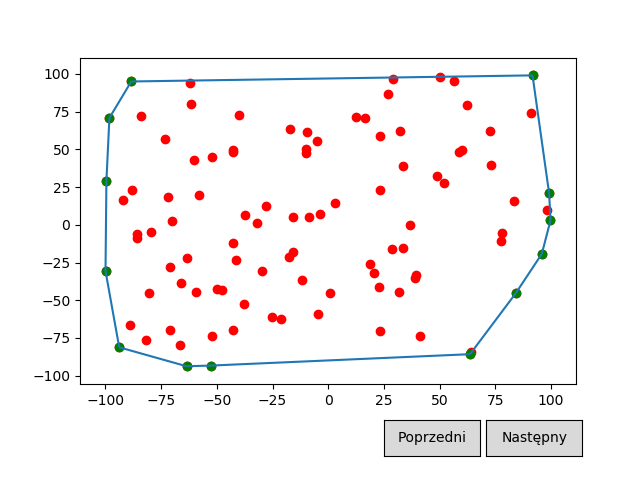

In [14]:
%matplotlib notebook
in_points = points_A.points
fun = Graham

points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)

plot.draw() 

Graham time:  0.38239049911499023


<IPython.core.display.Javascript object>


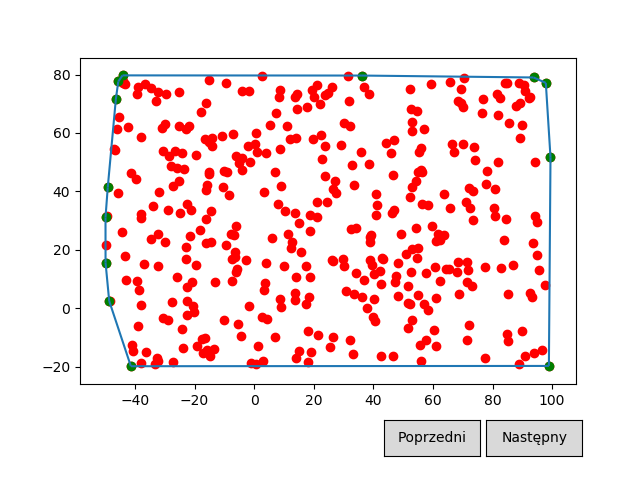

In [15]:
%matplotlib notebook
in_points = create_A(-50, 100, -20, 80, 400).points
fun = Graham

points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)

plot.draw() 

Graham time:  0.12595319747924805


<IPython.core.display.Javascript object>


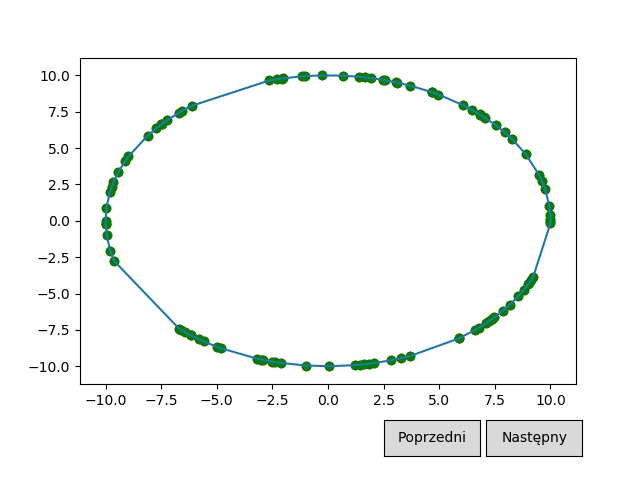

In [16]:
%matplotlib notebook
in_points = points_B.points
fun = Graham

points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)

plot.draw() 

Graham time:  0.010996103286743164


<IPython.core.display.Javascript object>


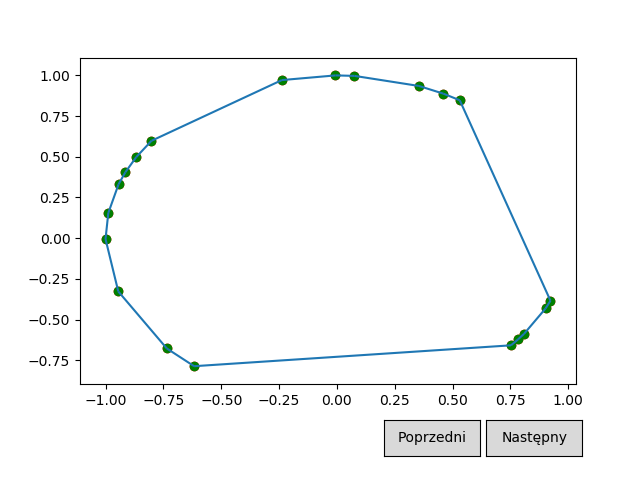

In [17]:
%matplotlib notebook
in_points = create_B(1, 20).points
fun = Graham

points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)

plot.draw() 

Graham time:  0.04699301719665527


<IPython.core.display.Javascript object>


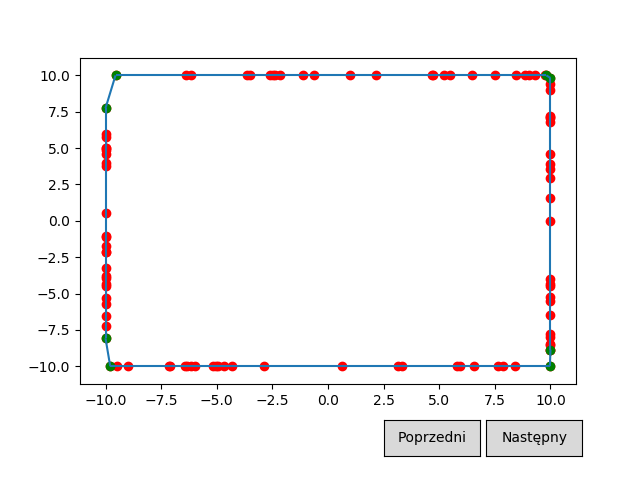

In [18]:
%matplotlib notebook
in_points = points_C.points
fun = Graham
points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)
plot.draw() 

Graham time:  0.006997585296630859


<IPython.core.display.Javascript object>


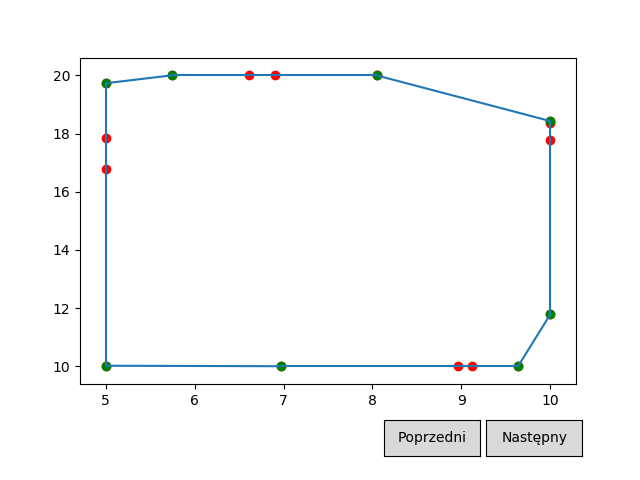

In [73]:
%matplotlib notebook
in_points = create_C(10,20,10,5, 16).points
fun = Graham

points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)

plot.draw() 

Graham time:  0.0679783821105957


<IPython.core.display.Javascript object>


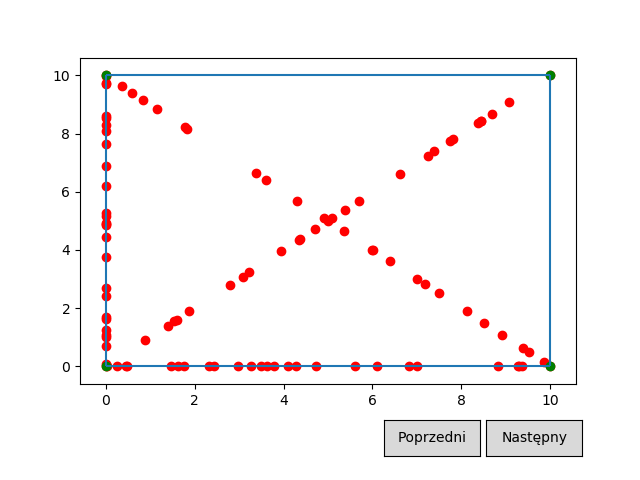

In [71]:
%matplotlib notebook
in_points = points_D.points
fun = Graham
points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)
plot.draw() 

Graham time:  0.04298543930053711


<IPython.core.display.Javascript object>


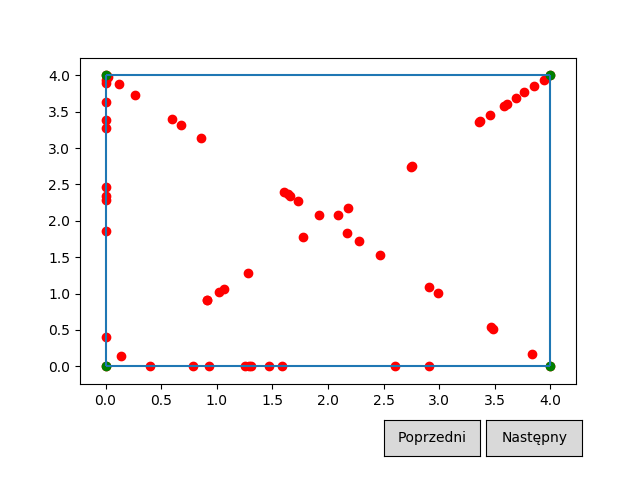

In [72]:
%matplotlib notebook
in_points = create_D(0,0,4,10,20).points
fun = Graham
points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)
plot.draw()

Jarvis time:  0.060979604721069336


<IPython.core.display.Javascript object>


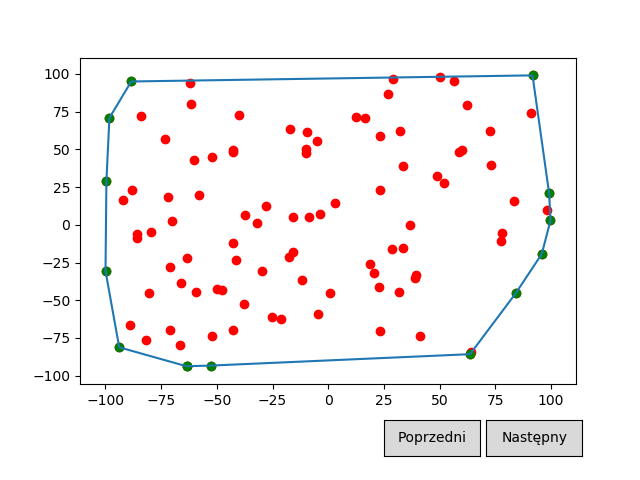

In [22]:
%matplotlib notebook
in_points = points_A.points
fun = Jarvis

points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)

plot.draw() 

Jarvis time:  0.3009004592895508


<IPython.core.display.Javascript object>


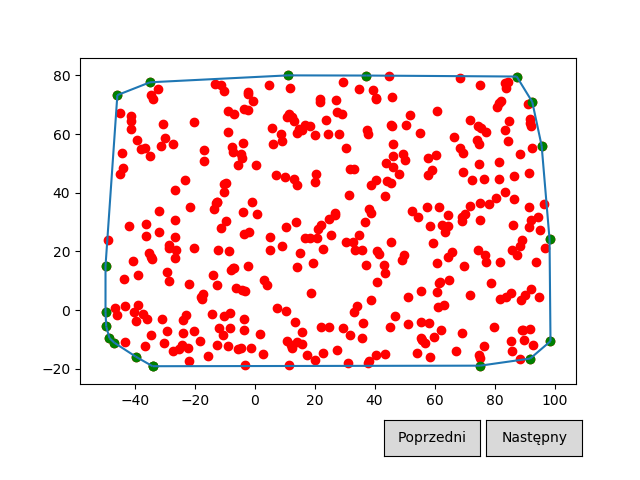

In [23]:
%matplotlib notebook
in_points = create_A(-50, 100, -20, 80, 400).points
fun = Jarvis

points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)

plot.draw() 

Jarvis time:  0.5195775032043457


<IPython.core.display.Javascript object>


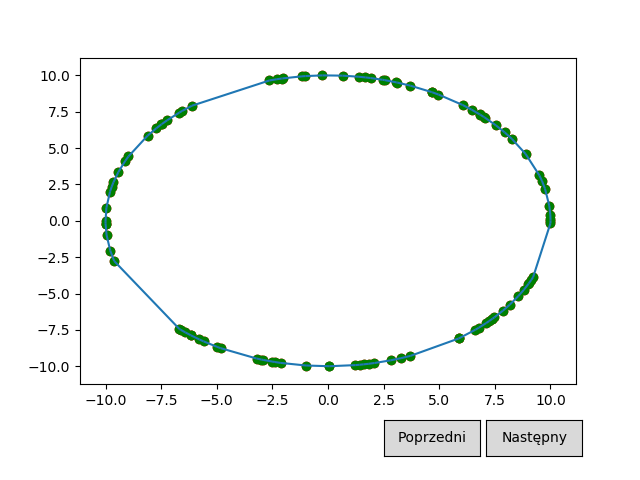

In [29]:
%matplotlib notebook
in_points = points_B.points
fun = Jarvis

points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)

plot.draw() 

Jarvis time:  0.023990631103515625


<IPython.core.display.Javascript object>


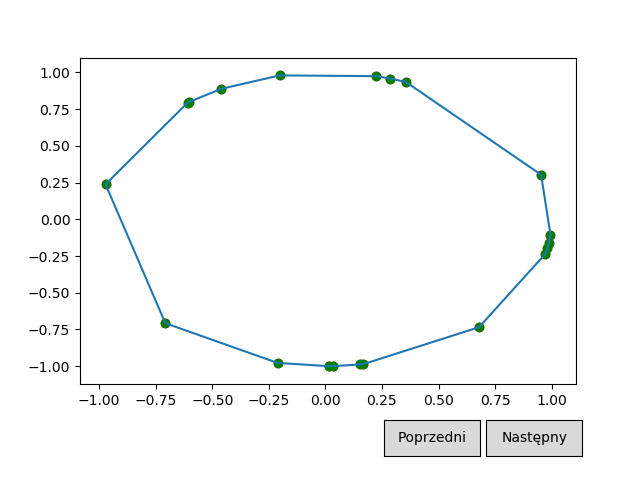

In [30]:
%matplotlib notebook
in_points = create_B(1, 20).points
fun = Jarvis

points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)

plot.draw() 

Jarvis time:  0.03699827194213867


<IPython.core.display.Javascript object>


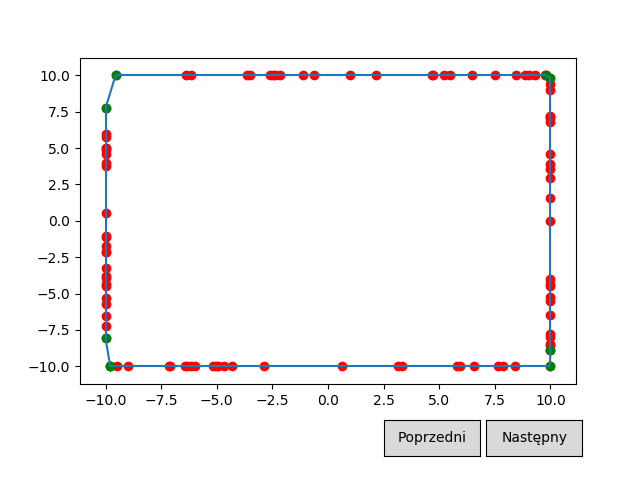

In [31]:
%matplotlib notebook
in_points = points_C.points
fun = Jarvis
points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)
plot.draw() 

Jarvis time:  0.007996559143066406


<IPython.core.display.Javascript object>


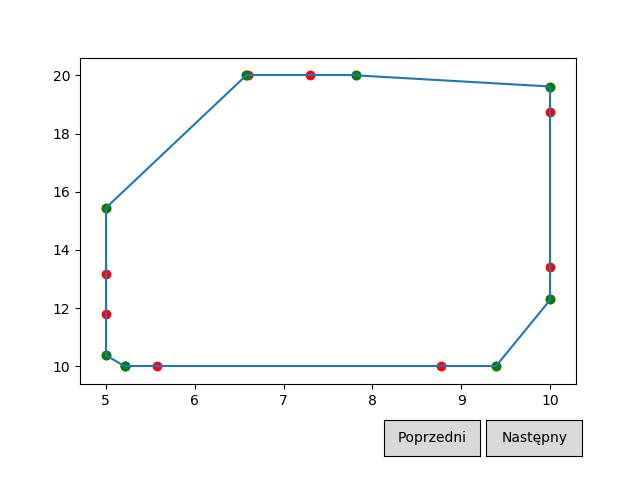

In [32]:
%matplotlib notebook
in_points = create_C(10,20,10,5, 16).points
fun = Jarvis

points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)

plot.draw() 

Jarvis time:  0.02799057960510254 3


<IPython.core.display.Javascript object>


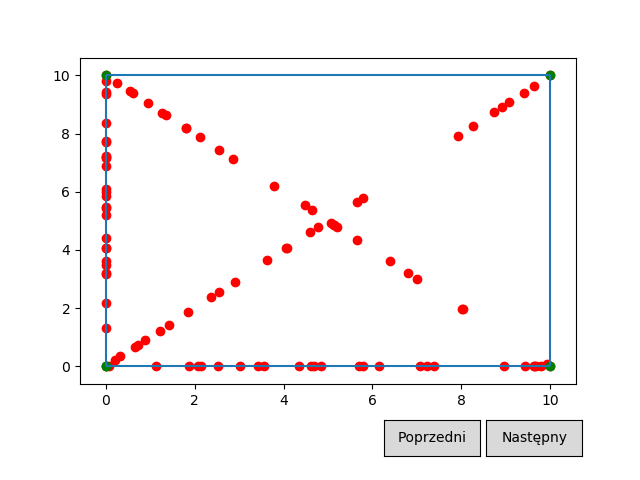

In [10]:
%matplotlib notebook
in_points = points_D.points
fun = Jarvis
points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)
plot.draw() 

Jarvis time:  0.008996248245239258 3


<IPython.core.display.Javascript object>


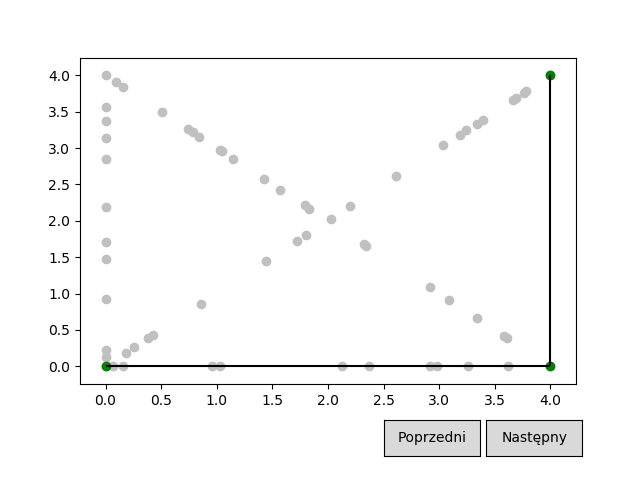

In [11]:
%matplotlib notebook
in_points = create_D(0,0,4,10,20).points
fun = Jarvis
points_out, anim = fun(in_points, True)
scenes=[Scene([PointsCollection(in_points, color='red')
               , PointsCollection(points_out, 'green')]
              ,[LinesCollection(points_to_lines(points_out, True))]) ]
plot = Plot(scenes + anim)
plot.draw()

<b>Porównanie czasów algorytmów</b>

Losowe rozmieszczenie

In [29]:
print("Losowe rozmieszczenie")
A_small = create_A(-50, 100, -20, 80, 40).points
print("40 punktów")
_,_ = Graham(A_small, False)
_,_ = Jarvis(A_small, False)
A_medium = create_A(-50, 100, -20, 80, 400).points
print("400 punktów")
_,_ = Graham(A_medium, False)
_,_ = Jarvis(A_medium, False)
A_large = create_A(-50, 100, -20, 80, 4000).points
print("4000 punktów")
_,_ = Graham(A_large, False)
_,_ = Jarvis(A_large, False)
A_verylarge = create_A(-50, 100, -20, 80, 40000).points
print("40000 punktów")
_,_ = Graham(A_verylarge, False)
_,_ = Jarvis(A_verylarge, False)

Losowe rozmieszczenie
40 punktów
Graham time:  0.00400996208190918 Liczba wierzchołków:  9
Jarvis time:  0.010985136032104492 Liczba wierzchołków:  9
400 punktów
Graham time:  0.055176496505737305 Liczba wierzchołków:  16
Jarvis time:  0.20398736000061035 Liczba wierzchołków:  16
4000 punktów
Graham time:  0.7843441963195801 Liczba wierzchołków:  22
Jarvis time:  2.7505805492401123 Liczba wierzchołków:  22
40000 punktów
Graham time:  10.02099323272705 Liczba wierzchołków:  32
Jarvis time:  38.90890026092529 Liczba wierzchołków:  32


Okrąg

In [30]:
print("Okrąg")
B_small = create_B(100, 40).points
print("40 punktów")
_,_ = Graham(B_small, False)
_,_ = Jarvis(B_small, False)
B_medium = create_B(100, 400).points
print("400 punktów")
_,_ = Graham(B_medium, False)
_,_ = Jarvis(B_medium, False)
B_large = create_B(100, 800).points
print("800 punktów")
_,_ = Graham(B_large, False)
_,_ = Jarvis(B_large, False)
B_verylarge = create_B(100, 1600).points
print("1600 punktów")
_,_ = Graham(B_verylarge, False)
_,_ = Jarvis(B_verylarge, False)

Okrąg
40 punktów
Graham time:  0.003999948501586914 Liczba wierzchołków:  40
Jarvis time:  0.04817605018615723 Liczba wierzchołków:  40
400 punktów
Graham time:  0.06296420097351074 Liczba wierzchołków:  400
Jarvis time:  4.878718614578247 Liczba wierzchołków:  400
800 punktów
Graham time:  0.10504508018493652 Liczba wierzchołków:  800
Jarvis time:  19.31255078315735 Liczba wierzchołków:  800
1600 punktów
Graham time:  0.2483968734741211 Liczba wierzchołków:  1600
Jarvis time:  76.56581568717957 Liczba wierzchołków:  1600


In [31]:
print("Kwadrat")
C_small = create_C(0,100, 0,100, 40).points
print("40 punktów")
_,_ = Graham(C_small, False)
_,_ = Jarvis(C_small, False)
C_medium = create_C(0,100, 0,100, 400).points
print("400 punktów")
_,_ = Graham(C_medium, False)
_,_ = Jarvis(C_medium, False)
C_large = create_C(0,100, 0,100, 800).points
print("800 punktów")
_,_ = Graham(C_large, False)
_,_ = Jarvis(C_large, False)
C_verylarge = create_C(0,100, 0,100, 1600).points
print("1600 punktów")
_,_ = Graham(C_verylarge, False)
_,_ = Jarvis(C_verylarge, False)

Kwadrat
40 punktów
Graham time:  0.006998538970947266 Liczba wierzchołków:  8
Jarvis time:  0.010003328323364258 Liczba wierzchołków:  8
400 punktów
Graham time:  0.04413104057312012 Liczba wierzchołków:  8
Jarvis time:  0.09597229957580566 Liczba wierzchołków:  8
800 punktów
Graham time:  0.0959615707397461 Liczba wierzchołków:  8
Jarvis time:  0.19829344749450684 Liczba wierzchołków:  8
1600 punktów
Graham time:  0.22292208671569824 Liczba wierzchołków:  8
Jarvis time:  0.3918881416320801 Liczba wierzchołków:  8


In [32]:
print("Kwadrat z przekątnymi")
D_small = create_D(0,0,10,1000,1000).points
print("1000 punktów na bokach i 1000 punktów na przekątnych ")
_,_ = Graham(D_small, False)
_,_ = Jarvis(D_small, False)
D_medium = create_D(0,0,10,2000,2000).points
print("2000 punktów na bokach i 2000 punktów na przekątnych ")
_,_ = Graham(D_medium, False)
_,_ = Jarvis(D_medium, False)
D_large = create_D(0,0,10,4000,4000).points
print("4000 punktów na bokach i 4000 punktów na przekątnych ")
_,_ = Graham(D_large, False)
_,_ = Jarvis(D_large, False)
D_verylarge = create_D(0,0,10,8000,8000).points
print("8000 punktów na bokach i 8000 punktów na przekątnych ")
_,_ = Graham(D_verylarge, False)
_,_ = Jarvis(D_verylarge, False)

Kwadrat z przekątnymi
1000 punktów na bokach i 1000 punktów na przekątnych 
Graham time:  0.713839054107666 Liczba wierzchołków:  4
Jarvis time:  0.4828176498413086 Liczba wierzchołków:  4
2000 punktów na bokach i 2000 punktów na przekątnych 
Graham time:  1.5882384777069092 Liczba wierzchołków:  4
Jarvis time:  0.9522943496704102 Liczba wierzchołków:  4
4000 punktów na bokach i 4000 punktów na przekątnych 
Graham time:  3.34566068649292 Liczba wierzchołków:  4
Jarvis time:  1.9694736003875732 Liczba wierzchołków:  4
8000 punktów na bokach i 8000 punktów na przekątnych 
Graham time:  7.396121263504028 Liczba wierzchołków:  4
Jarvis time:  3.8447282314300537 Liczba wierzchołków:  4
